In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.Gender = data.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [5]:
X = data.drop("Weight",axis=1).values
y = data.Weight.values

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

# Network Architecture

In [8]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['r2_score'])

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26474.9551 - r2_score: -24.7880 
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20427.4395 - r2_score: -18.8968 
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7723.1177 - r2_score: -6.5227   
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1823.5872 - r2_score: -0.7762 
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 921.4918 - r2_score: 0.1024  
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.3834 - r2_score: 0.4415 
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 343.6603 - r2_score: 0.6653 
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210.6373 - r2_score: 0.7948  
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146.2929 - r2_score: 0.8575
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.7529 - r2_score: 0.8843
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 108.2159 - r2_score: 0.8946 
Epoch

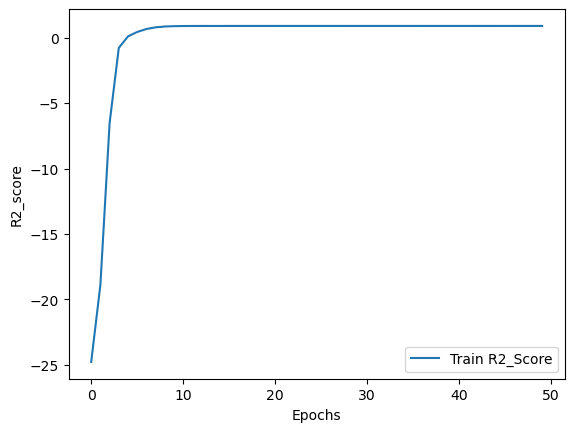

In [11]:
# Plot training history
plt.plot(history.history['r2_score'], label='Train R2_Score')
plt.xlabel("Epochs")
plt.ylabel("R2_score")
plt.legend()
plt.show()



In [14]:
sample_data = np.array([[1, 70]])  # Male, Height=70 inches
sample_data_scaled = scaler.transform(sample_data)
predicted_weight = model.predict(sample_data_scaled)
print(f"Predicted Weight: {predicted_weight[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Weight: 192.89
